In [824]:
%run code/import_libs.py
%run code/functions.py
%run code/Build_Forms.py
%run code/initial_data_prep.py

%matplotlib inline


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 30)
pd.options.display.float_format = '{:,}'.format

df['year_of_sale']=df['date'].apply(lambda x: str.split(x,'/')[2]).astype(int)


#FILTER

#df=df[df['yr_built']>1980]
#df=df[df['price']<2000000].copy()
df=df[df['sqft_living']<8000].copy()
#df=df[df['sqft_lot']<1000000].copy()
df=df[~df["grade"].isin([3,4,5])]





In [825]:
df['zipcode'].value_counts().head()
np.percentile(df['sqft_living'], 49), np.percentile(df['sqft_living'], 51)
df['grade'].mean()


7.690991854336368

In [826]:
df['condition'].value_counts()

3    13610
4     5464
5     1631
2      147
1       18
Name: condition, dtype: int64

In [827]:
avg_sq_df=df[(df['sqft_living'] >= 1850) & (df['sqft_living'] <= 2050)].copy()

avg_grade_df=df[df['grade'].isin([7,8])]


avg_sq_grade_df=avg_sq_df[avg_sq_df['grade'].isin([7,8])]


avg_grade_zip_df=avg_grade_df[avg_grade_df['zipcode'].isin([98011,98014,98024])]

by_zipcode_df=df.groupby('zipcode').mean().reset_index()[['zipcode','price','price_per_sqft']].sort_values(by='price', \
                                                                                                       ascending=False)
by_zipcode_df['price']=by_zipcode_df['price'].round()
by_zipcode_df['price_per_sqft']=by_zipcode_df['price_per_sqft'].round()

quant_low= by_zipcode_df['price_per_sqft'].quantile(0.40)
quant_high= by_zipcode_df['price_per_sqft'].quantile(0.60)
quant_lowAvg=by_zipcode_df[by_zipcode_df['price_per_sqft']>quant_low] 
quantileAvg_zips=quant_lowAvg[by_zipcode_df['price_per_sqft'] < quant_high]

avg_zipcode_df=df[df['zipcode'].isin(quantileAvg_zips['zipcode'])]

avg_sq_zip_df=avg_sq_df[avg_sq_df['zipcode'].isin(quantileAvg_zips['zipcode'])]

quantileAvg_zips['zipcode'].unique().shape



(13,)

In [828]:
by_zipcode_df

,zipcode,price,price_per_sqft
24,98039,"1,961,383.0",563.0
3,98004,"1,326,448.0",474.0
25,98040,"1,185,324.0",387.0
48,98112,"1,100,568.0",438.0
47,98109,"876,985.0",433.0
43,98105,"866,582.0",405.0
53,98119,"861,480.0",435.0
5,98006,"852,624.0",299.0
41,98102,"835,053.0",422.0
4,98005,"810,291.0",316.0


In [829]:
by_grade_df=avg_sq_df.groupby('grade').mean().reset_index()[['grade','price','price_per_sqft']].sort_values(by='price_per_sqft', \
                                                                                                       ascending=False)


In [830]:
worst_zipcodes_df=df[df['zipcode'].isin (zipcode_worst_df['zipcode'])].copy()
best_zipcodes_df=df[df['zipcode'].isin (zipcode_best_df['zipcode'])].copy()

In [831]:
by_zipcode_df['price_per_sqft'].quantile(0.25)

191.5

In [832]:
avg_grade_zip_df[['grade','zipcode']].value_counts()



grade  zipcode
7      98011      82
8      98011      61
7      98014      45
       98024      26
8      98014      20
       98024      14
dtype: int64

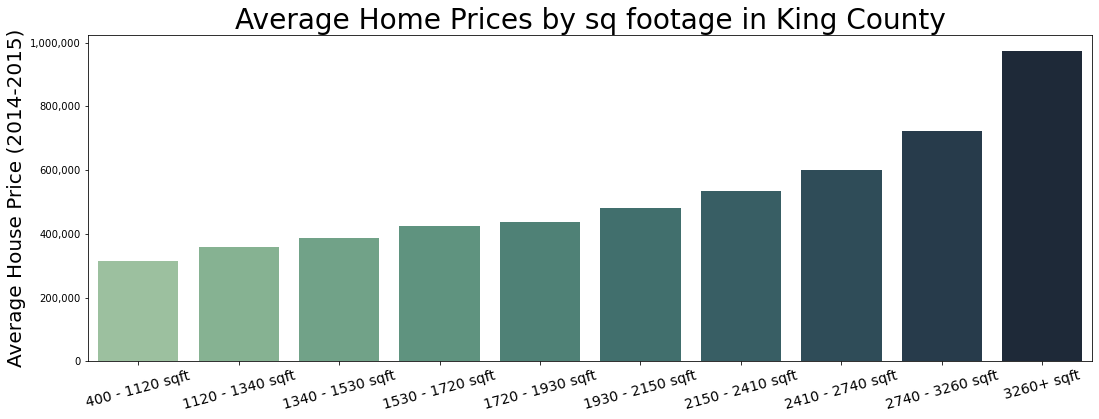

In [844]:
size_labels = np.array(["400 - 1120 sqft","1120 - 1340 sqft","1340 - 1530 sqft","1530 - 1720 sqft","1720 - 1930 sqft","1930 - 2150 sqft","2150 - 2410 sqft",\
               "2410 - 2740 sqft","2740 - 3260 sqft","3260+ sqft"])

df['sqft_living_bins']=pd.qcut(df['sqft_living'],q=10, labels=size_labels)

by_size_df=df.groupby('sqft_living_bins').mean().reset_index()[['sqft_living_bins','price','price_per_sqft']].sort_values(by='price', \
                                                                                                       ascending=False)
by_size_df['price']=by_size_df['price'].round()
by_size_df['price_per_sqft']=by_size_df['price_per_sqft'].round()


fig, ax = plt.subplots(figsize=(18,6))

sns.barplot(x='price', y='price', data=by_size_df,
            order=by_size_df.sort_values('price')['price'], palette="ch:r=-.5,l=.7")


ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title("Average Home Prices by sq footage in King County", size=28)
ax.set_ylabel("Average House Price (2014-2015)", size=20)
ax.set_xlabel("", size=24)


ax.set_xticklabels(size_labels, fontsize=14, rotation=15 )

fig.savefig('images/by_size.png')




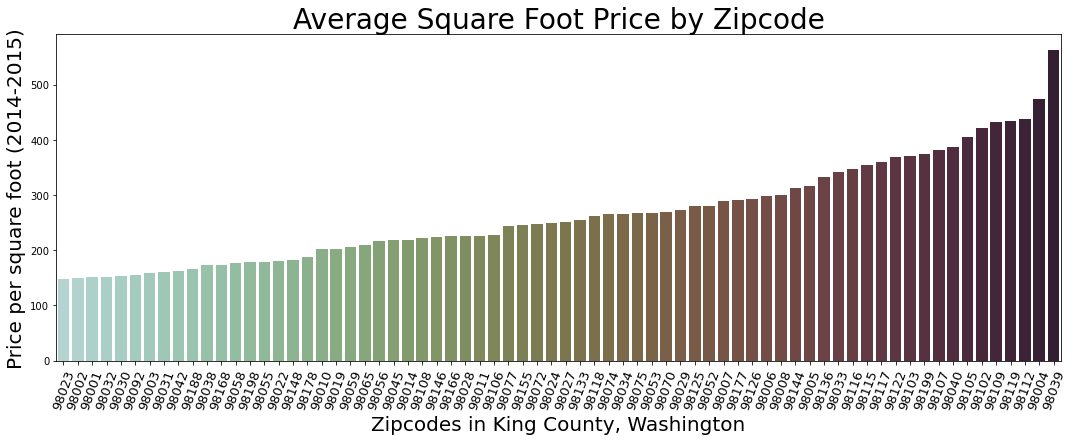

In [834]:
by_zipcode_df=df.groupby('zipcode').mean().reset_index()[['zipcode','price','price_per_sqft']].sort_values(by='price', \
                                                                                                       ascending=False)
by_zipcode_df['price']=by_zipcode_df['price'].round()
by_zipcode_df['price_per_sqft']=by_zipcode_df['price_per_sqft'].round()


fig, ax = plt.subplots(figsize=(18,6))

plt.xticks(rotation=70);
sns.barplot(x='zipcode', y='price_per_sqft', data=by_zipcode_df,
            order=by_zipcode_df.sort_values('price_per_sqft')['zipcode'], palette="ch:r=1,l=0.8")

pd.set_option('display.float_format', lambda x: '%.7f' % x)
#ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Average Square Foot Price by Zipcode", size=28)
ax.set_ylabel("Price per square foot (2014-2015)", size=20)
ax.set_xlabel("Zipcodes in King County, Washington", size=20)

plt.xticks(fontsize=13 ) ;

fig.savefig('images/by_zipcode.png')


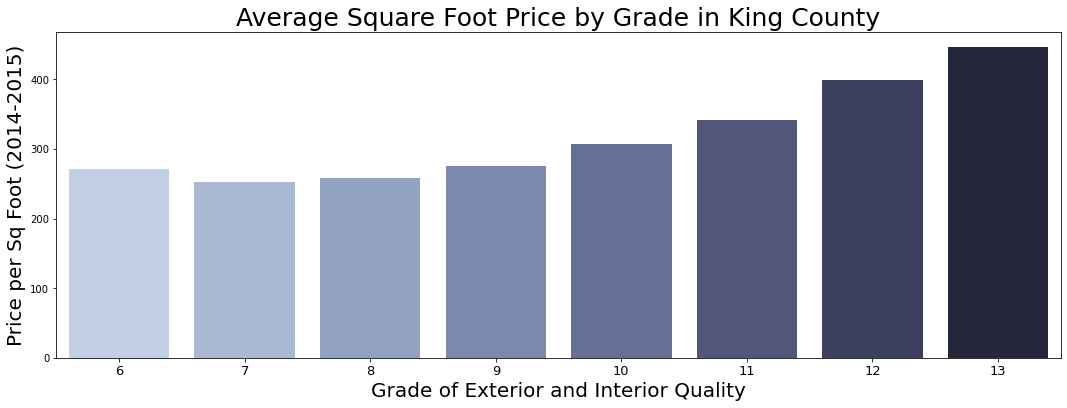

In [835]:
#by_grade_df=avg_zipcode_df.groupby('grade').mean().reset_index()[['grade','price','price_per_sqft']].sort_values(by='price_per_sqft', \
by_grade_df=df.groupby('grade').mean().reset_index()[['grade','price','price_per_sqft']].sort_values(by='price_per_sqft', \
                                                                                                        ascending=True)

fig, ax = plt.subplots(figsize=(18,6))


sns.barplot(x='grade', y='price_per_sqft', data=by_grade_df,
            order=by_grade_df.sort_values('grade')['grade'], palette="ch:r=-.1,l=.8")

pd.set_option('display.float_format', lambda x: '%.7f' % x)
#ax[0].get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title("Average Square Foot Price by Grade in King County", size=25)
ax.set_ylabel("Price per Sq Foot (2014-2015)" , size=20)
ax.set_xlabel("Grade of Exterior and Interior Quality", size=20)

plt.xticks(fontsize=13 ) ;

fig.savefig('images/by_grade.png')


<AxesSubplot:xlabel='sqft_living'>

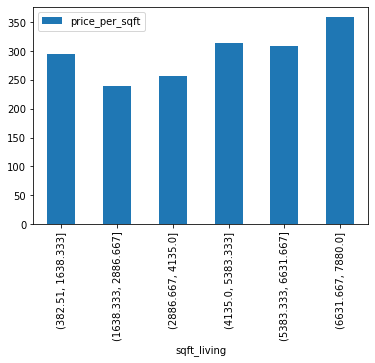

In [836]:
bins=pd.cut(df['sqft_living'], bins=6)
df[['price_per_sqft']].groupby(bins).agg('mean').plot.bar()


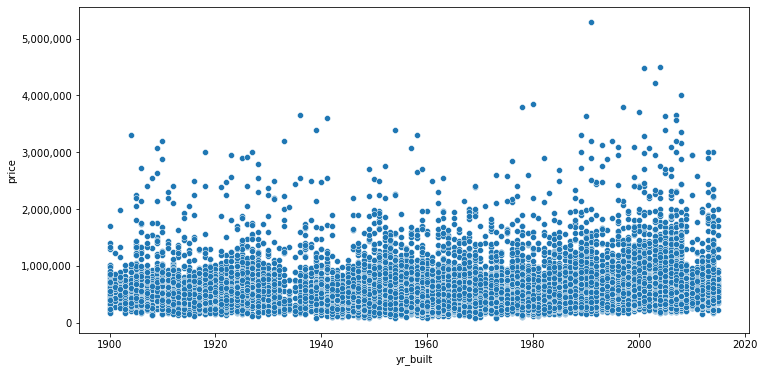

In [837]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot('yr_built','price', data=df, ax=ax)
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))



In [838]:

df.groupby('year_of_sale').median()['price']

year_of_sale
2014   452000.0000000
2015   455000.0000000
Name: price, dtype: float64

In [839]:
dd



NameError: name 'dd' is not defined

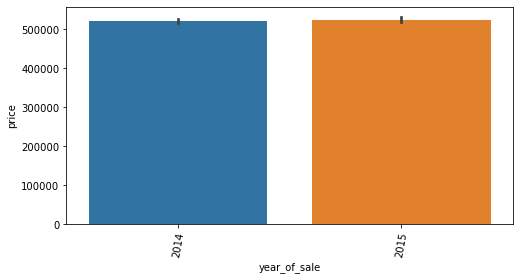

In [840]:

df=df[df['price']<2000000].copy()
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot('year_of_sale','price',  data=df, ax=ax)
plt.xticks(rotation=80);


In [841]:
pvalue_dic={}
for zipcode_val in by_zipcode_df['zipcode']:
#    avg_sq_zip_df=avg_sq_df[avg_sq_df['zipcode']== zipcode_val]
    avg_grade_zip_df=avg_grade_df[avg_grade_df['zipcode']== zipcode_val]
      
    
    df2=avg_grade_zip_df
#    df2=df
    pvalue_list=[]
    for i in range(100):
        experiment=df2[df2['basement']==1]

        control=df2[df2['basement']!=1] #.sample(n=100)

        #AUTOMATIC FOR 2-T-TEST T-WELCH
        pval=stats.ttest_ind( experiment['price_per_sqft'],control['price_per_sqft'],  equal_var = False, alternative='less')[1] # [alternative='two-sided' is default]

        pvalue_list.append(pval)

    average_pval=sum(pvalue_list)/len(pvalue_list)
    pvalue_dic[zipcode_val]=average_pval
#   print(zipcode_val, '{:.20f}'.format(average_pval))

#np.mean(list(pvalue_dic.values()))

pvalue_dic
None

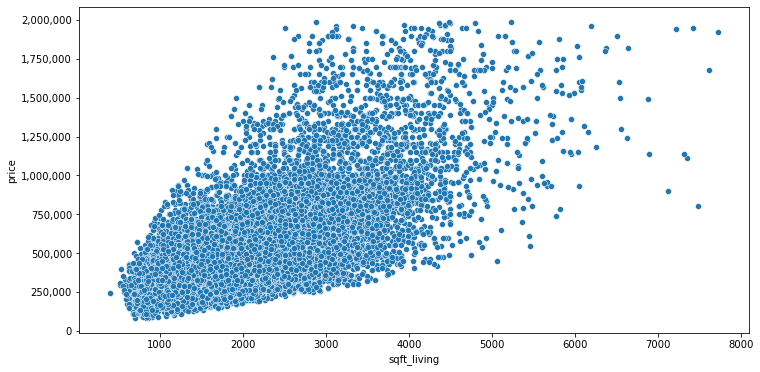

In [842]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot('sqft_living','price', data=df, ax=ax)

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))